<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Factors" data-toc-modified-id="Factors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Factors</a></span><ul class="toc-item"><li><span><a href="#Modifying-factor-order" data-toc-modified-id="Modifying-factor-order-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modifying factor order</a></span><ul class="toc-item"><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li></ul></li></ul></div>

# Factors

In [1]:
library(tidyverse) 
library(rethinking)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.


Attaching package: 'rstan'


The following object is masked from 'package:tidyr':

    extract


Loading r

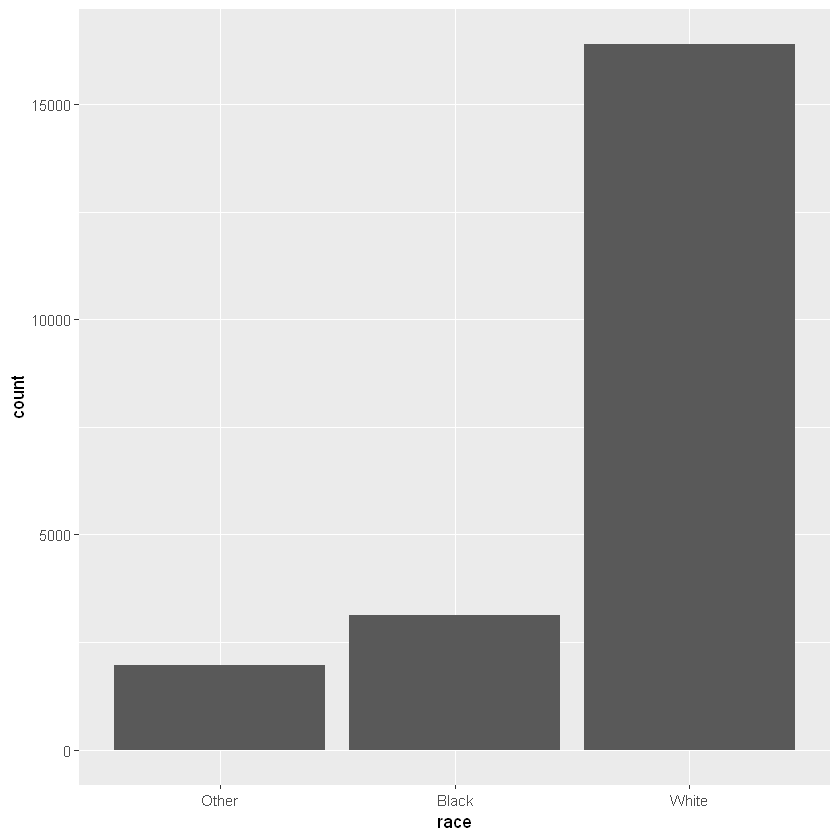

In [8]:
ggplot(gss_cat, aes(race)) +
    geom_bar()

<b><font color = 'purple'>1.  Explore the distribution of `rincome` (reported income). What makes the
    default bar chart hard to understand? How could you improve the plot? </font></b>

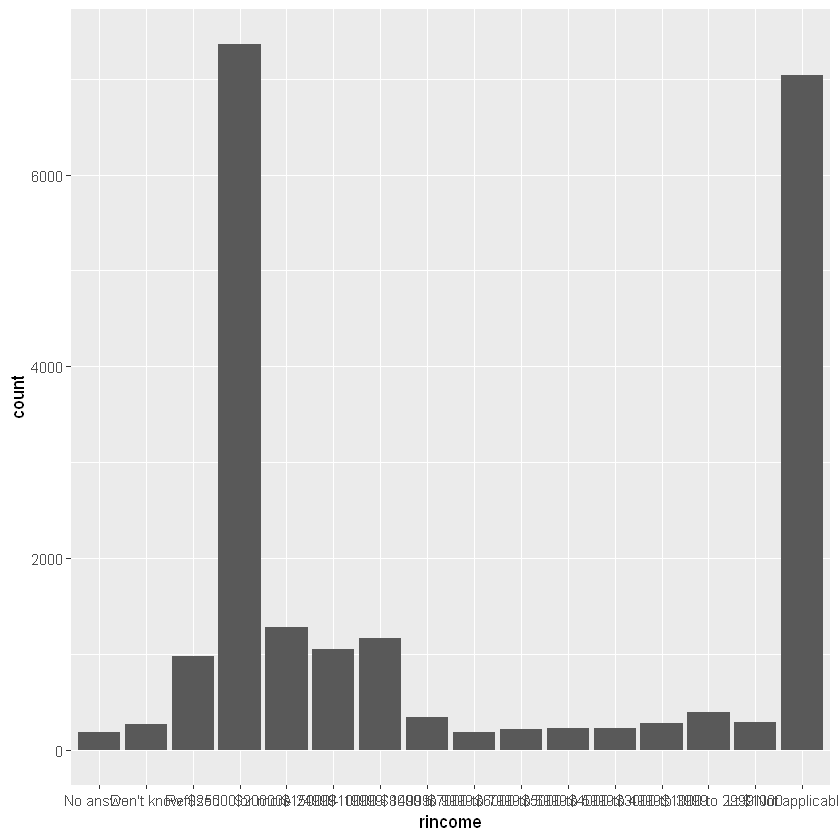

In [9]:
ggplot(gss_cat, aes(rincome)) +
    geom_bar()

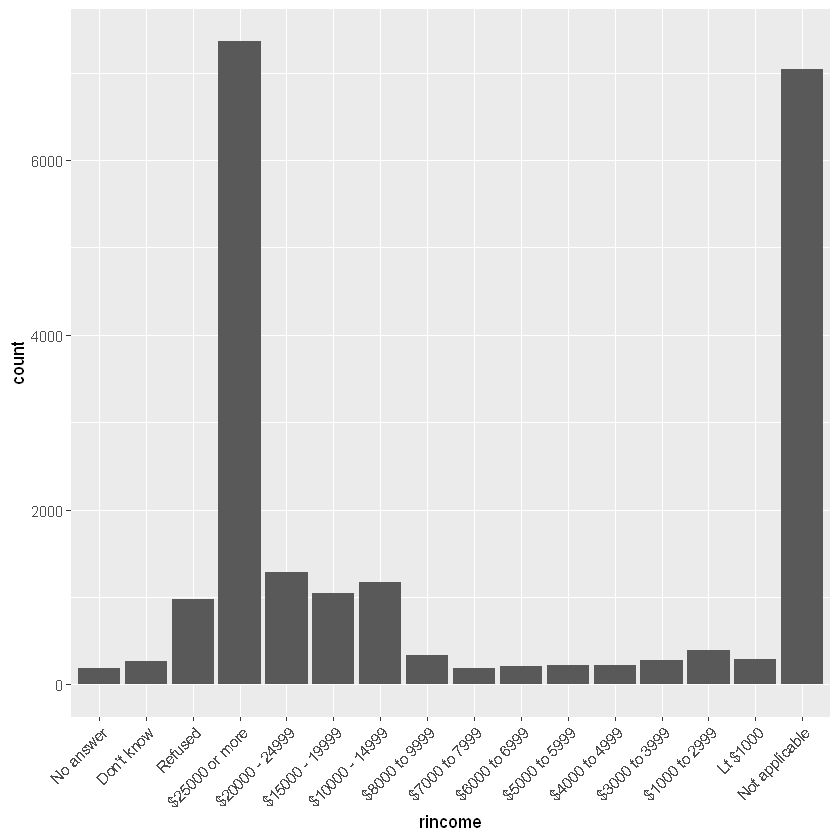

In [14]:
ggplot(gss_cat, aes(rincome)) +
    geom_bar() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))    

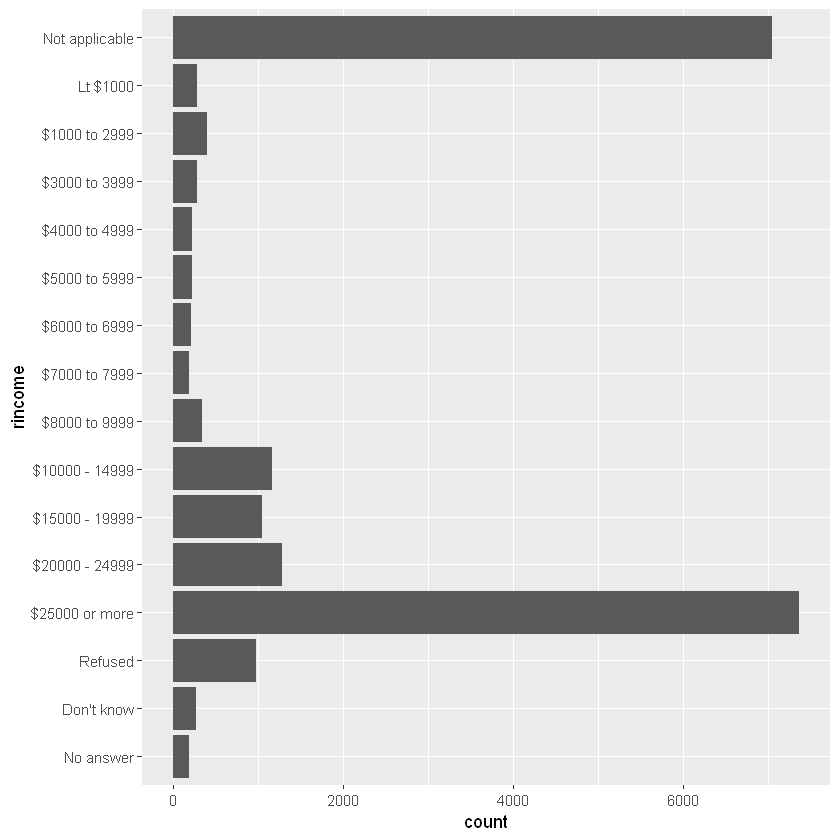

In [15]:
ggplot(gss_cat, aes(rincome)) +
    geom_bar() +
    coord_flip()

Though more than asked for in this question, I could further improve this plot by

1.  removing the “Not applicable” responses,
2.  renaming ```Lt $1000``` to ```Less than $1000```,
3.  using color to distinguish non-response categories (“Refused”, “Don’t know”, and “No answer”) from income levels (“Lt $1000”, …),
4.  adding meaningful y- and x-axis titles, and
5.  formatting the counts axis labels to use commas.

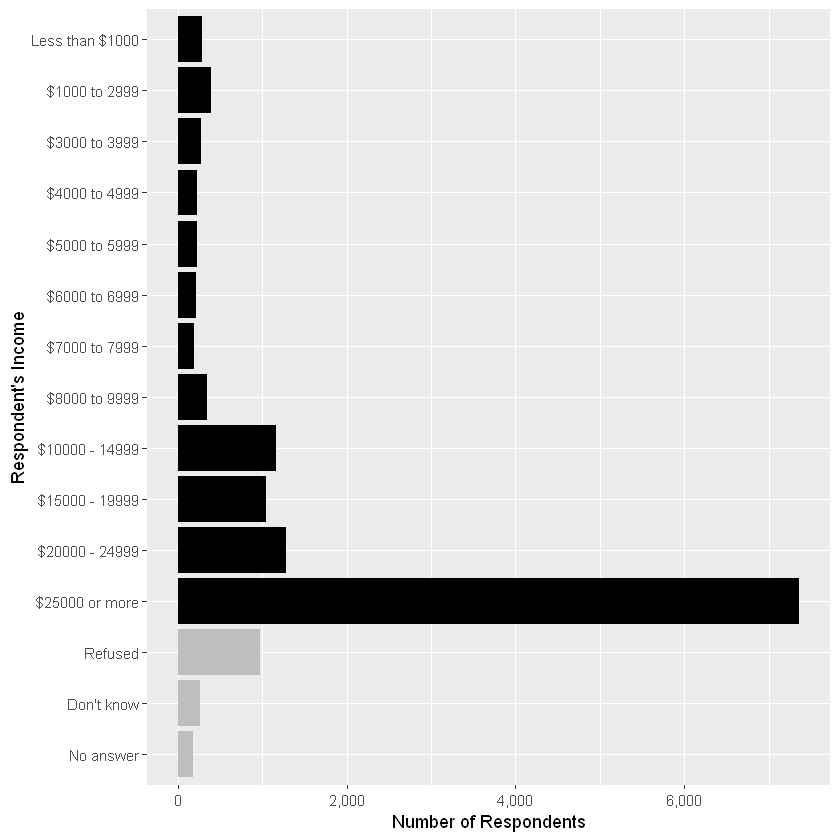

In [16]:
gss_cat %>%
  filter(!rincome %in% c("Not applicable")) %>%
  mutate(rincome = fct_recode(rincome,
    "Less than $1000" = "Lt $1000"
  )) %>%
  mutate(rincome_na = rincome %in% c("Refused", "Don't know", "No answer")) %>%
  ggplot(aes(x = rincome, fill = rincome_na)) +
  geom_bar() +
  coord_flip() +
  scale_y_continuous("Number of Respondents", labels = scales::comma) +
  scale_x_discrete("Respondent's Income") +
  scale_fill_manual(values = c("FALSE" = "black", "TRUE" = "gray")) +
  theme(legend.position = "None")

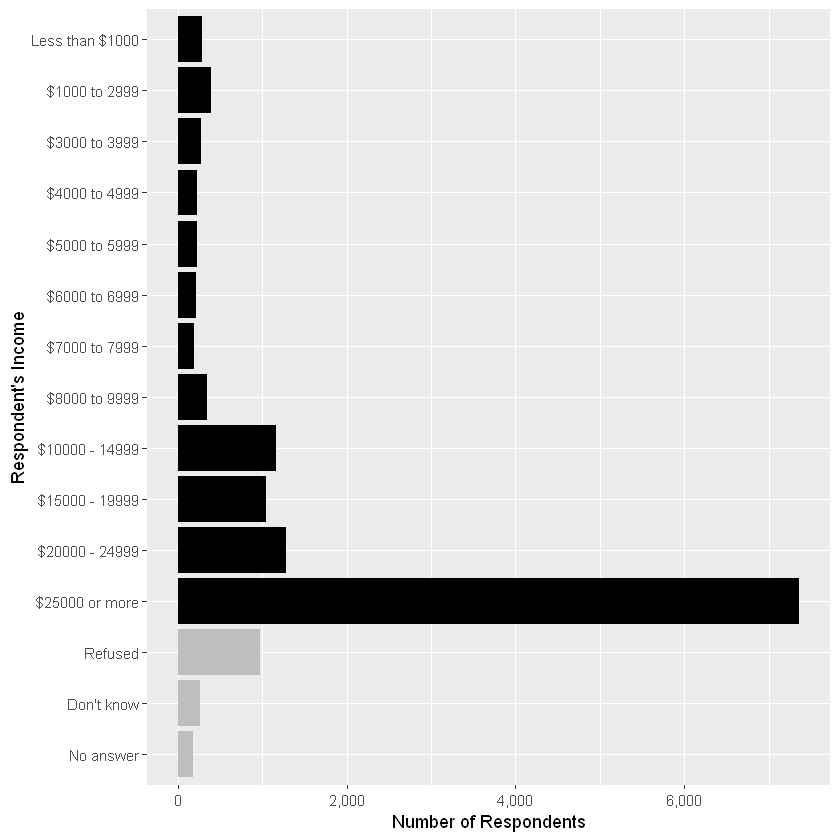

In [20]:
# experimenting with the syntax
gss_cat %>%
  filter(!(rincome %in% c("Not applicable"))) %>%
  mutate(rincome = fct_recode(rincome,
    "Less than $1000" = "Lt $1000"
  )) %>%
  mutate(rincome_na = rincome %in% c("Refused", "Don't know", "No answer")) %>%
  ggplot(aes(x = rincome, fill = rincome_na)) +
  geom_bar() +
  coord_flip() +
  scale_y_continuous("Number of Respondents", labels = scales::comma) +
  scale_x_discrete("Respondent's Income") +
  scale_fill_manual(values = c("FALSE" = "black", "TRUE" = "gray")) +
  theme(legend.position = "None")

If I were only interested in non-missing responses, then I could drop all respondents who answered “Not applicable”, “Refused”, “Don’t know”, or “No answer”.

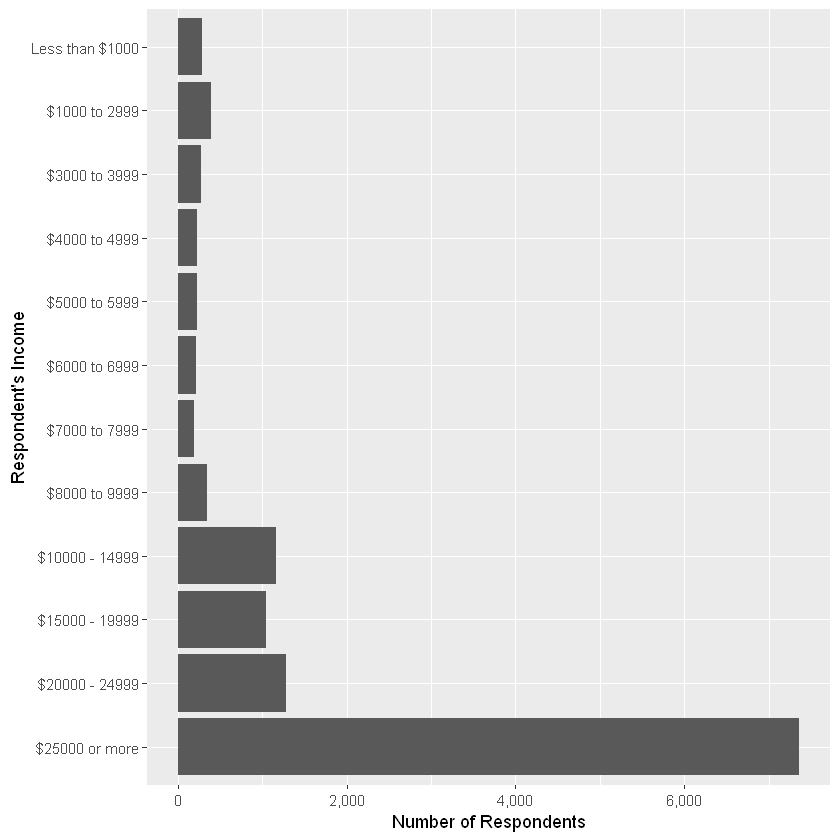

In [21]:
gss_cat %>%
  filter(!rincome %in% c("Not applicable", "Don't know", "No answer", "Refused")) %>%
  mutate(rincome = fct_recode(rincome,
    "Less than $1000" = "Lt $1000"
  )) %>%
  ggplot(aes(x = rincome)) +
  geom_bar() +
  coord_flip() +
  scale_y_continuous("Number of Respondents", labels = scales::comma) +
  scale_x_discrete("Respondent's Income")

<b><font color = 'purple'>2.  What is the most common `relig` in this survey? What’s the most
    common `partyid`? </font></b>

In [22]:
gss_cat %>%
  count(relig) %>%
  arrange(desc(n)) %>%
  head(1)
#> # A tibble: 1 x 2
#>   relig          n
#>   <fct>      <int>
#> 1 Protestant 10846

relig,n
<fct>,<int>
Protestant,10846


The most common partyid is “Independent”

In [27]:
gss_cat %>%
  count(partyid) %>%
  arrange(desc(n)) %>%
  head(1)
#> # A tibble: 1 x 2
#>   partyid         n
#>   <fct>       <int>
#> 1 Independent  4119

partyid,n
<fct>,<int>
Independent,4119


The most common `relig` is “Protestant”


<b><font color = 'purple'>3.  Which `relig` does `denom` (denomination) apply to? How can you find
    out with a table? How can you find out with a visualisation? </font></b>

In [31]:
levels(gss_cat$denom)

[1] "No answer"            "Don't know"           "No denomination"     
 [4] "Other"                "Episcopal"            "Presbyterian-dk wh"  
 [7] "Presbyterian, merged" "Other presbyterian"   "United pres ch in us"
[10] "Presbyterian c in us" "Lutheran-dk which"    "Evangelical luth"    
[13] "Other lutheran"       "Wi evan luth synod"   "Lutheran-mo synod"   
[16] "Luth ch in america"   "Am lutheran"          "Methodist-dk which"  
[19] "Other methodist"      "United methodist"     "Afr meth ep zion"    
[22] "Afr meth episcopal"   "Baptist-dk which"     "Other baptists"      
[25] "Southern baptist"     "Nat bapt conv usa"    "Nat bapt conv of am" 
[28] "Am bapt ch in usa"    "Am baptist asso"      "Not applicable"

From the context it is clear that `denom` refers to “Protestant” (and unsurprising given that it is the largest category in `freq`). Let’s filter out the non-responses, no answers, others, not-applicable, or no denomination, to leave only answers to denominations. After doing that, the only remaining responses are “Protestant”.

In [34]:
gss_cat %>%
  filter(!denom %in% c(
    "No answer", "Other", "Don't know", "Not applicable",
    "No denomination"
  )) %>%
  count(relig)
#> # A tibble: 1 x 2
#>   relig          n
#>   <fct>      <int>
#> 1 Protestant  7025

relig,n
<fct>,<int>
Protestant,7025


This is also clear in a scatter plot of `relig` vs. `denom` where the points are
proportional to the size of the number of answers (since otherwise there would be overplotting).

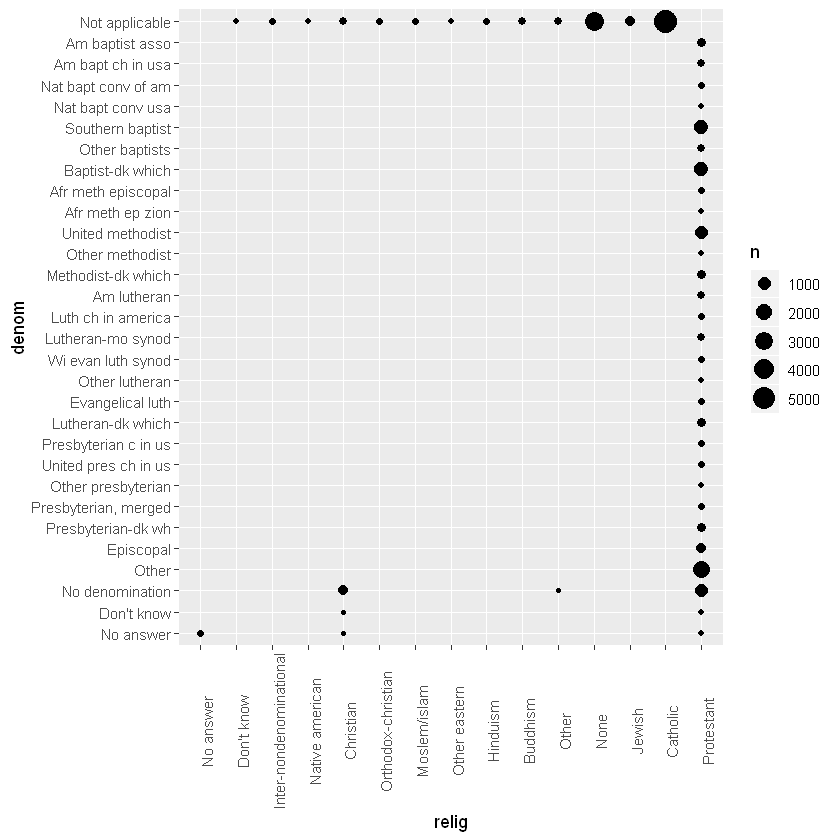

In [36]:
gss_cat %>%
  count(relig, denom) %>%
  ggplot(aes(x = relig, y = denom, size = n)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90))

## Modifying factor order

It’s often useful to change the order of the factor levels in a visualisation. For example, imagine you want to explore the average number of hours spent watching TV per day across religions:


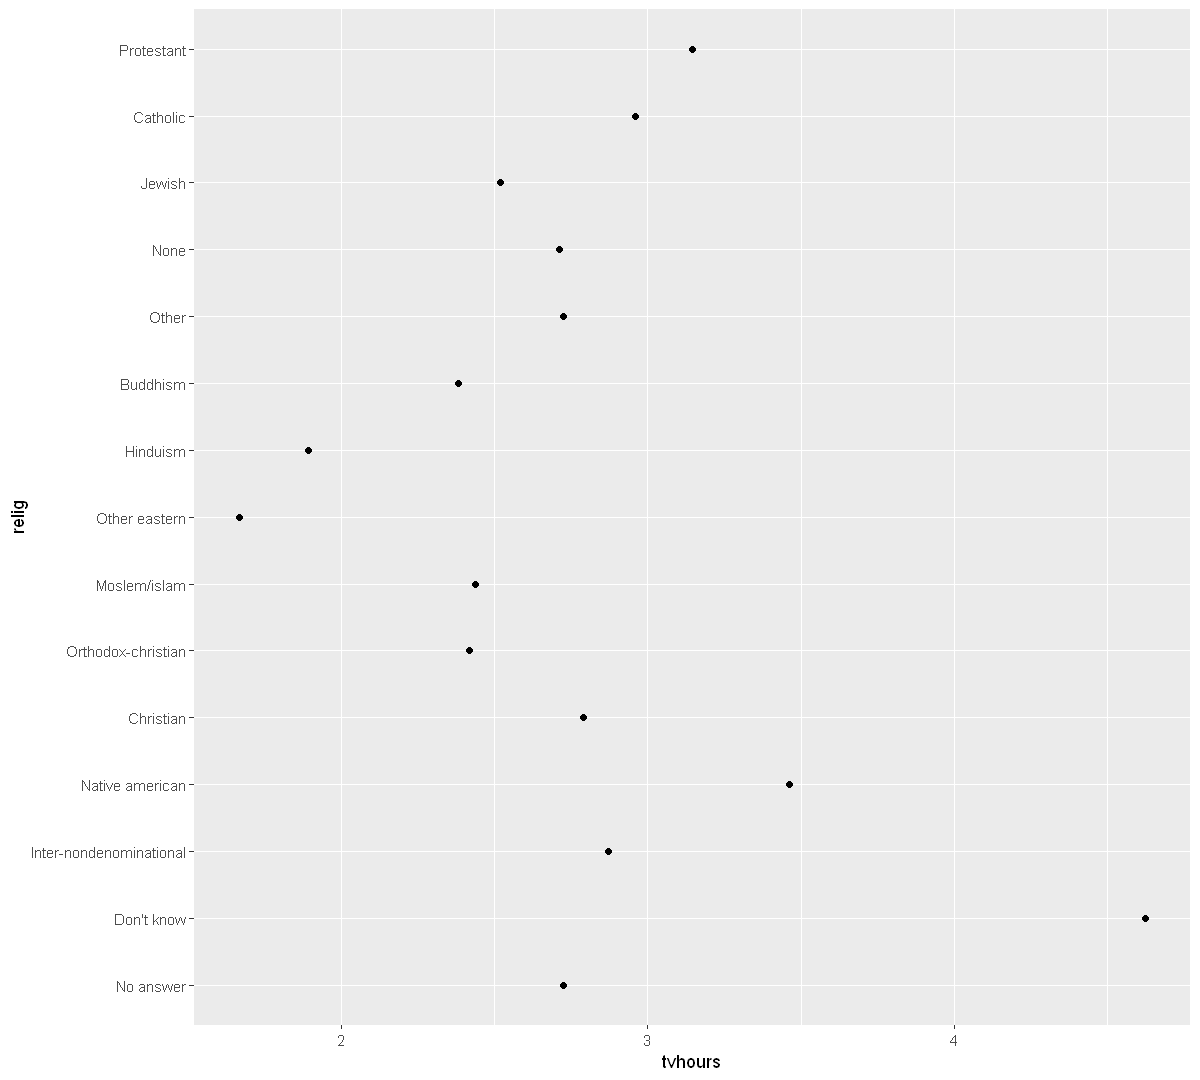

In [41]:
relig_summary <- gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(relig_summary, aes(tvhours, relig)) + geom_point()

It is difficult to interpret this plot because there’s no overall pattern. We can improve it by reordering the levels of `relig` using `fct_reorder()`. `fct_reorder()` takes three arguments:

* `f`, the factor whose levels you want to modify.
* `x`, a numeric vector that you want to use to reorder the levels.
* Optionally, `fun`, a function that’s used if there are multiple values of
    `x` for each value of `f`. The default value is `median`.

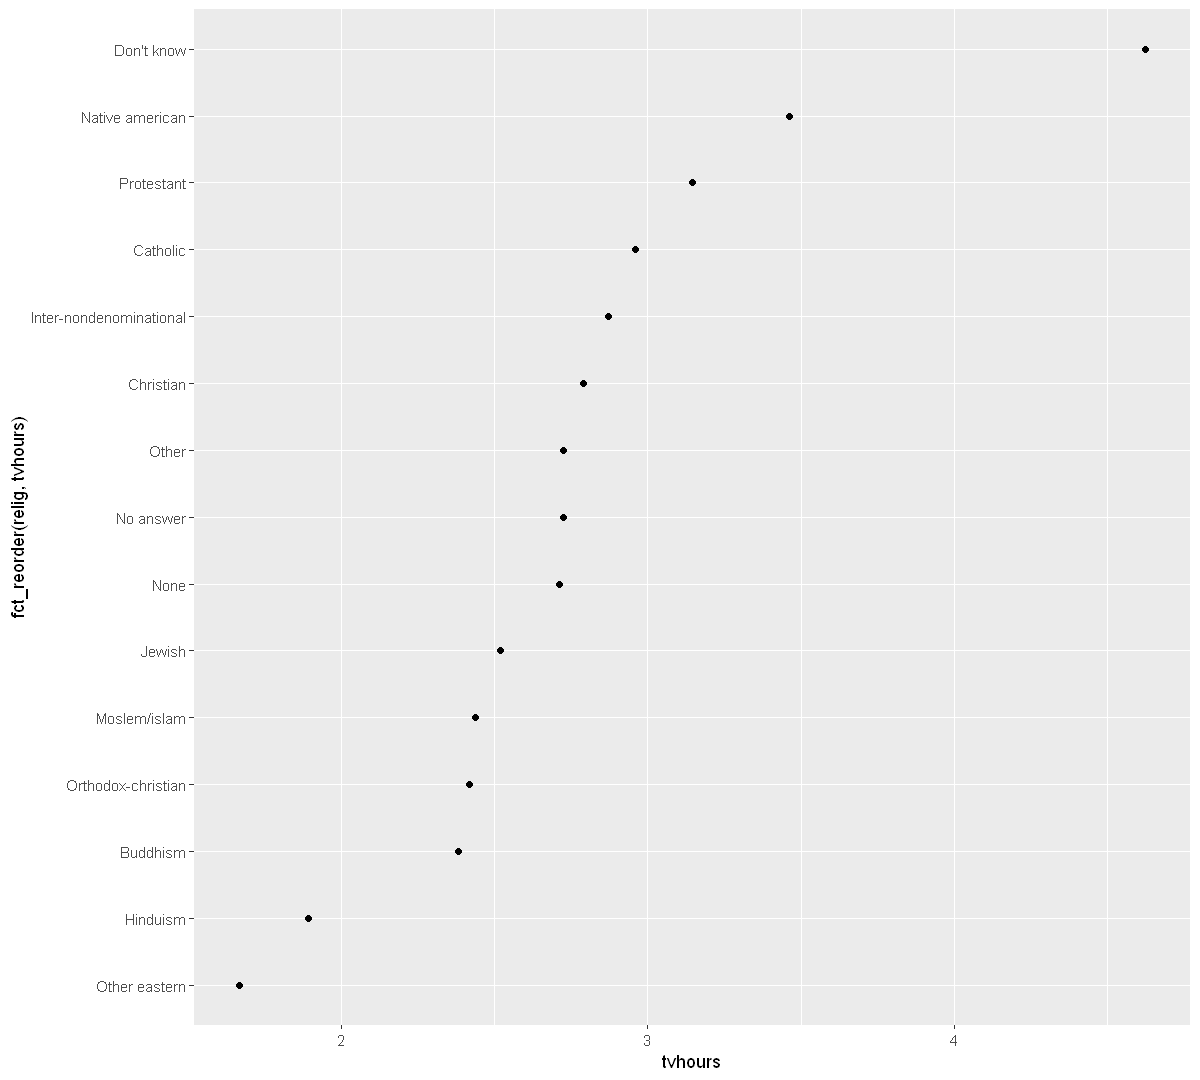

In [47]:
ggplot(relig_summary, aes(tvhours, fct_reorder(relig, tvhours))) +
  geom_point()

Reordering religion makes it much easier to see that people in the “Don’t know” category watch much more TV, and Hinduism & Other Eastern religions watch much less.

<font color = 'blue'><b>As you start making more complicated transformations, I’d recommend moving them out of `aes()` and into a separate `mutate()` step. For example, you could rewrite the plot above as:</b></font>

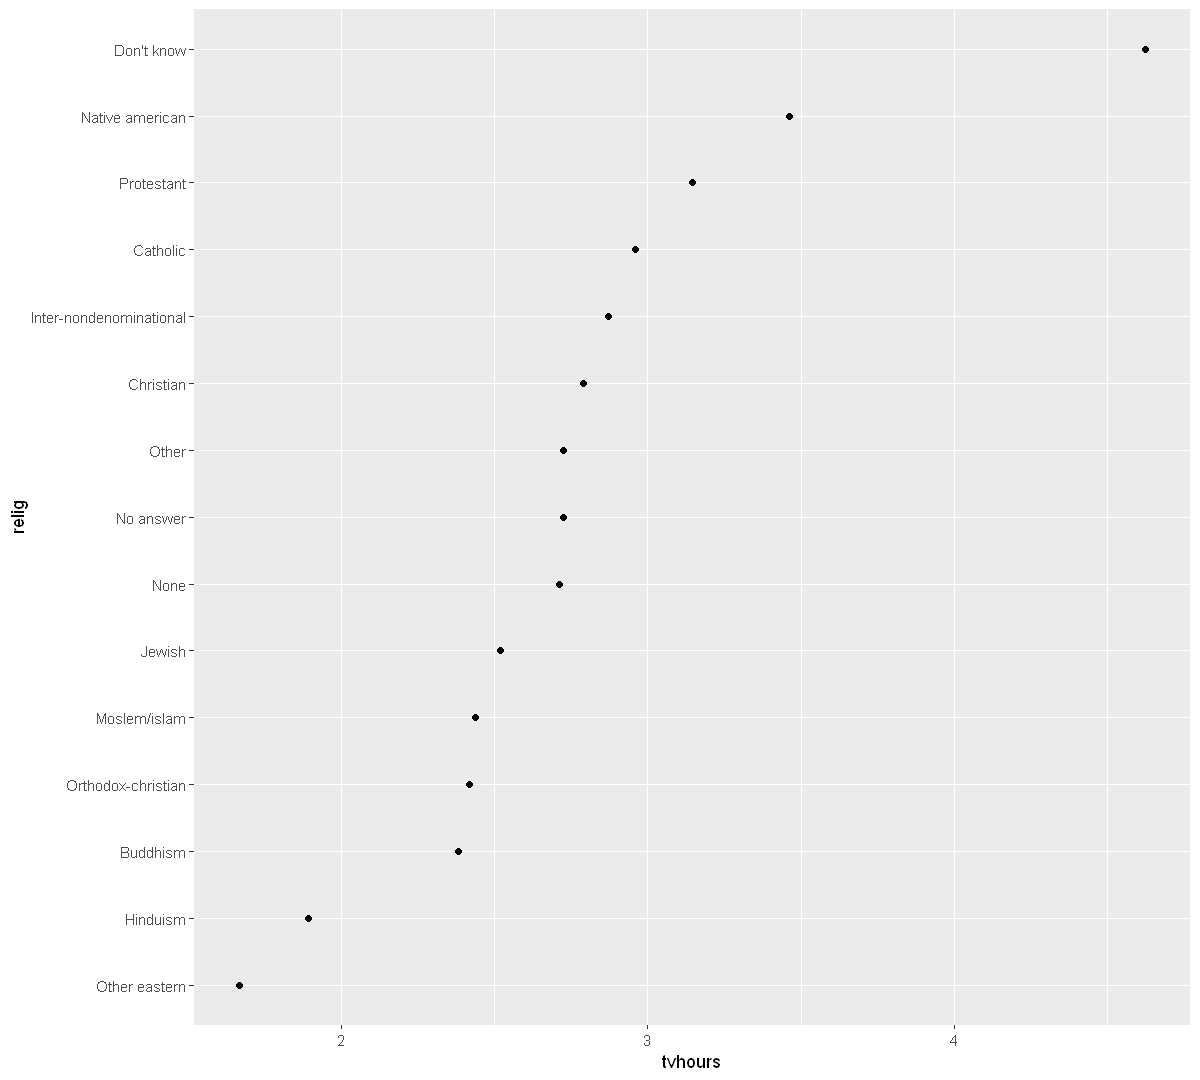

In [48]:
relig_summary %>%
  mutate(relig = fct_reorder(relig, tvhours)) %>%
  ggplot(aes(tvhours, relig)) +
    geom_point()

What if we create a similar plot looking at how average age varies across reported income level?


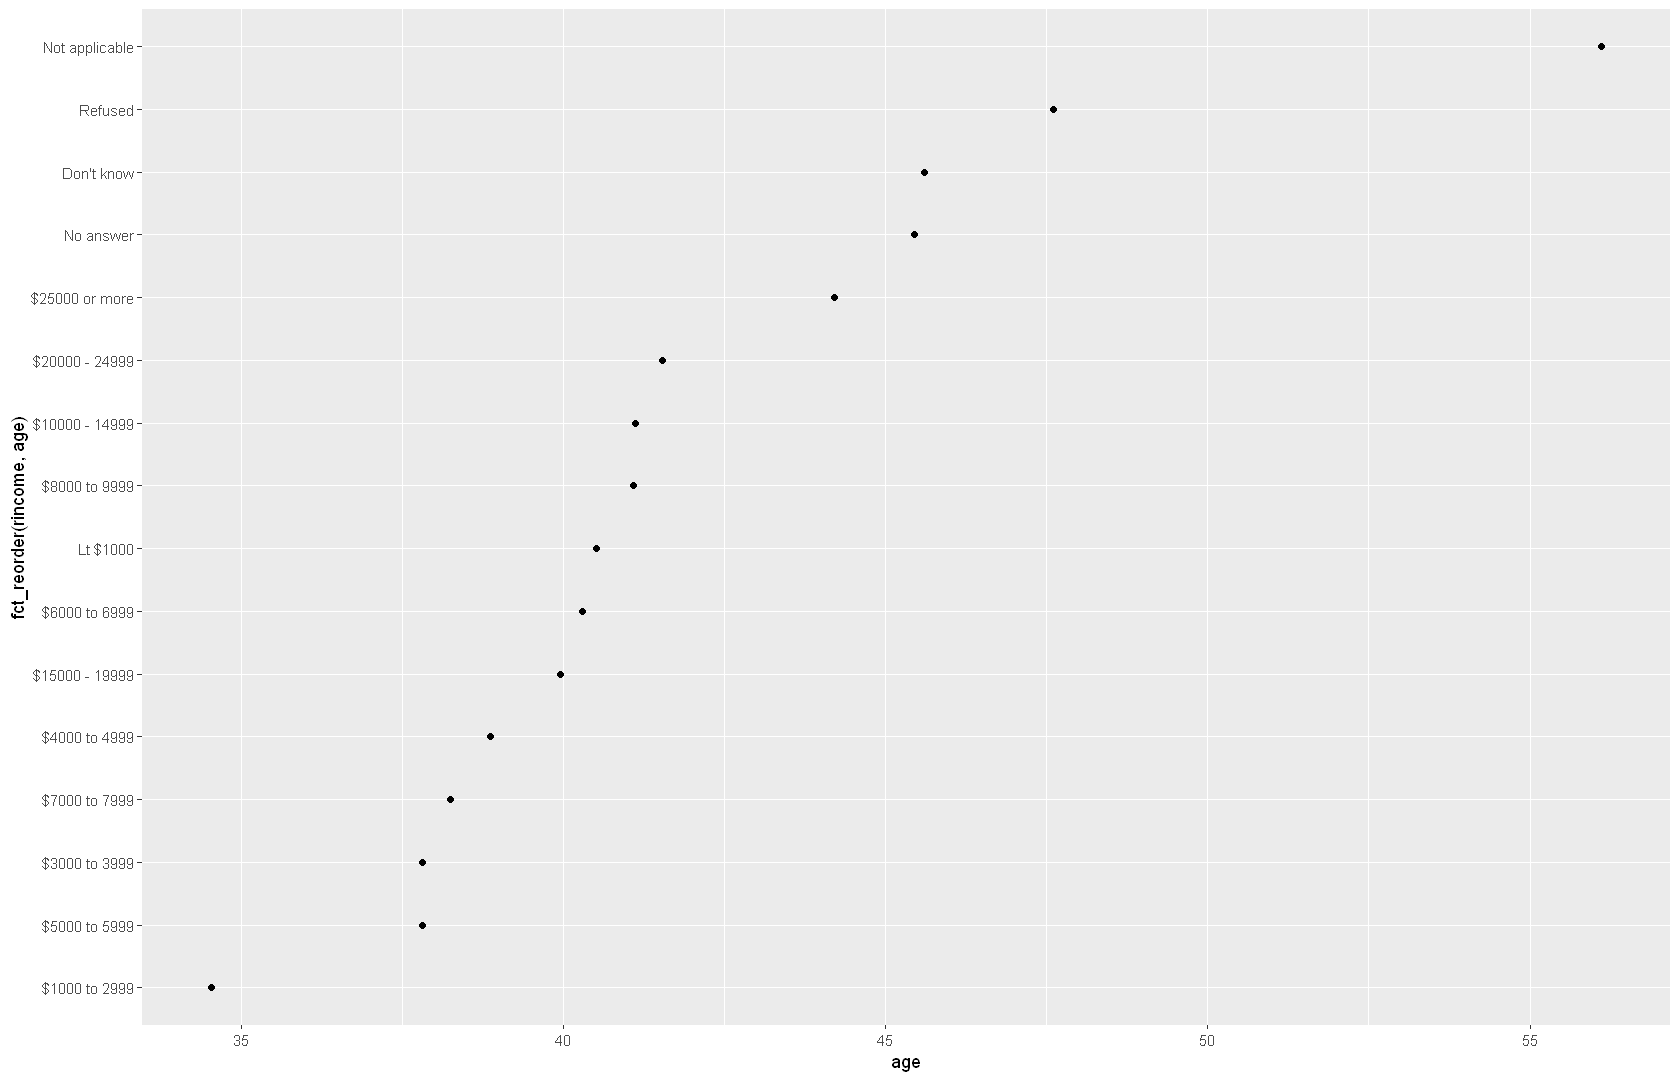

In [56]:
rincome_summary <- gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(rincome_summary, aes(age, fct_reorder(rincome, age))) + geom_point()

<font color = 'blue'>Here, arbitrarily reordering the levels isn’t a good idea! That’s because `rincome` already has a principled order that we shouldn’t mess with. Reserve `fct_reorder()` for factors whose levels are arbitrarily ordered.</font>

However, it does make sense to pull “Not applicable” to the front with the other special levels. You can use `fct_relevel()`. It takes a factor, `f`, and then any number of levels that you want to move to the front of the line.


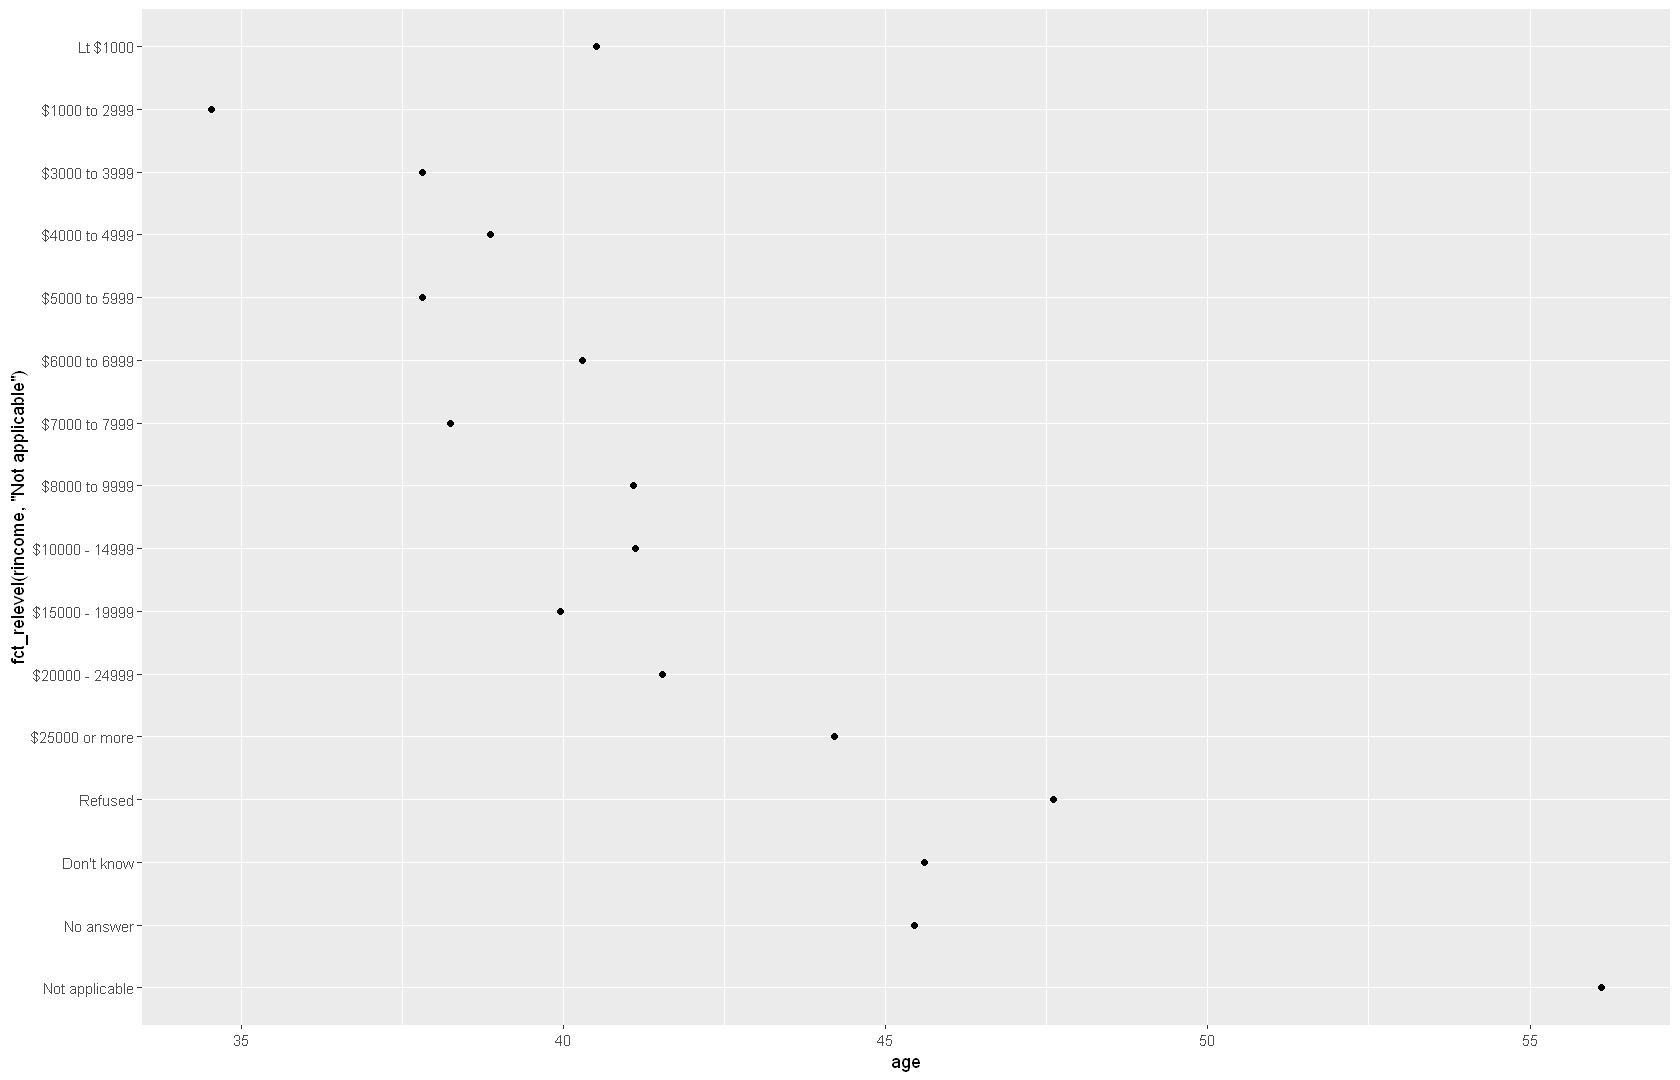

In [57]:
ggplot(rincome_summary, aes(age, fct_relevel(rincome, "Not applicable"))) +
  geom_point()

Why do you think the average age for “Not applicable” is so high?

Another type of reordering is useful when you are colouring the lines on a plot. `fct_reorder2()` reorders the factor by the `y` values associated with the largest `x` values. This makes the plot easier to read because the line colours line up with the legend.

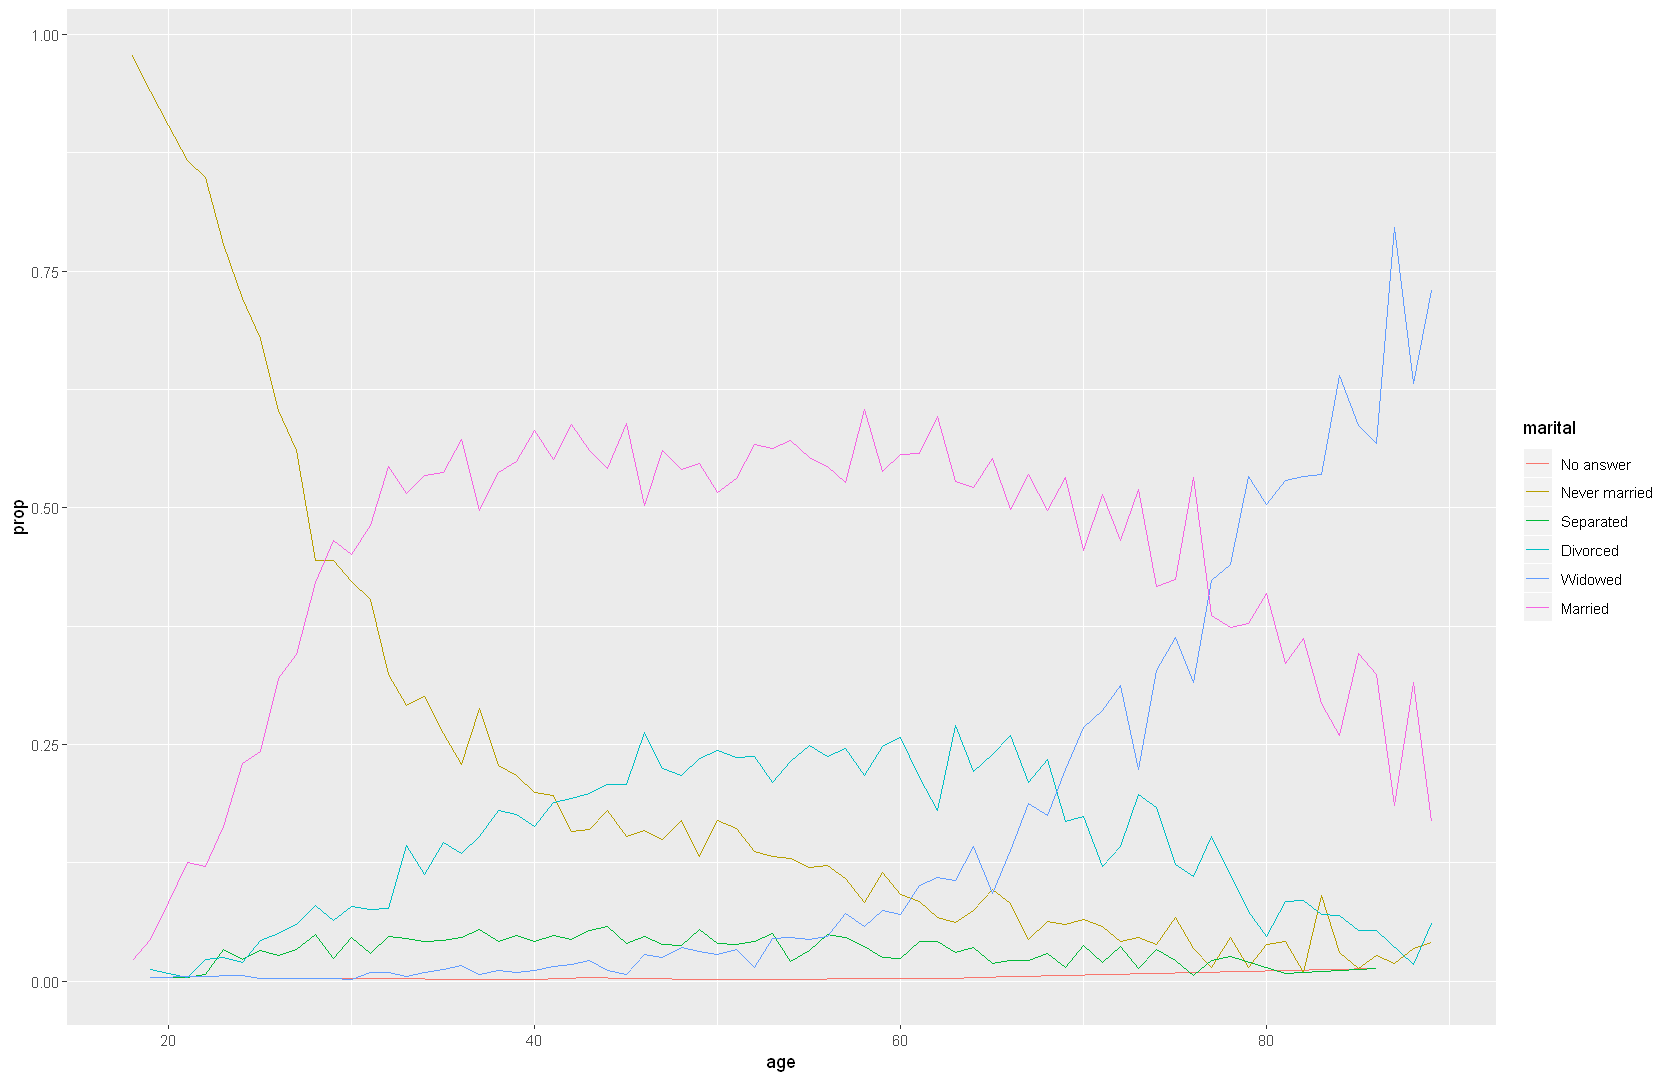

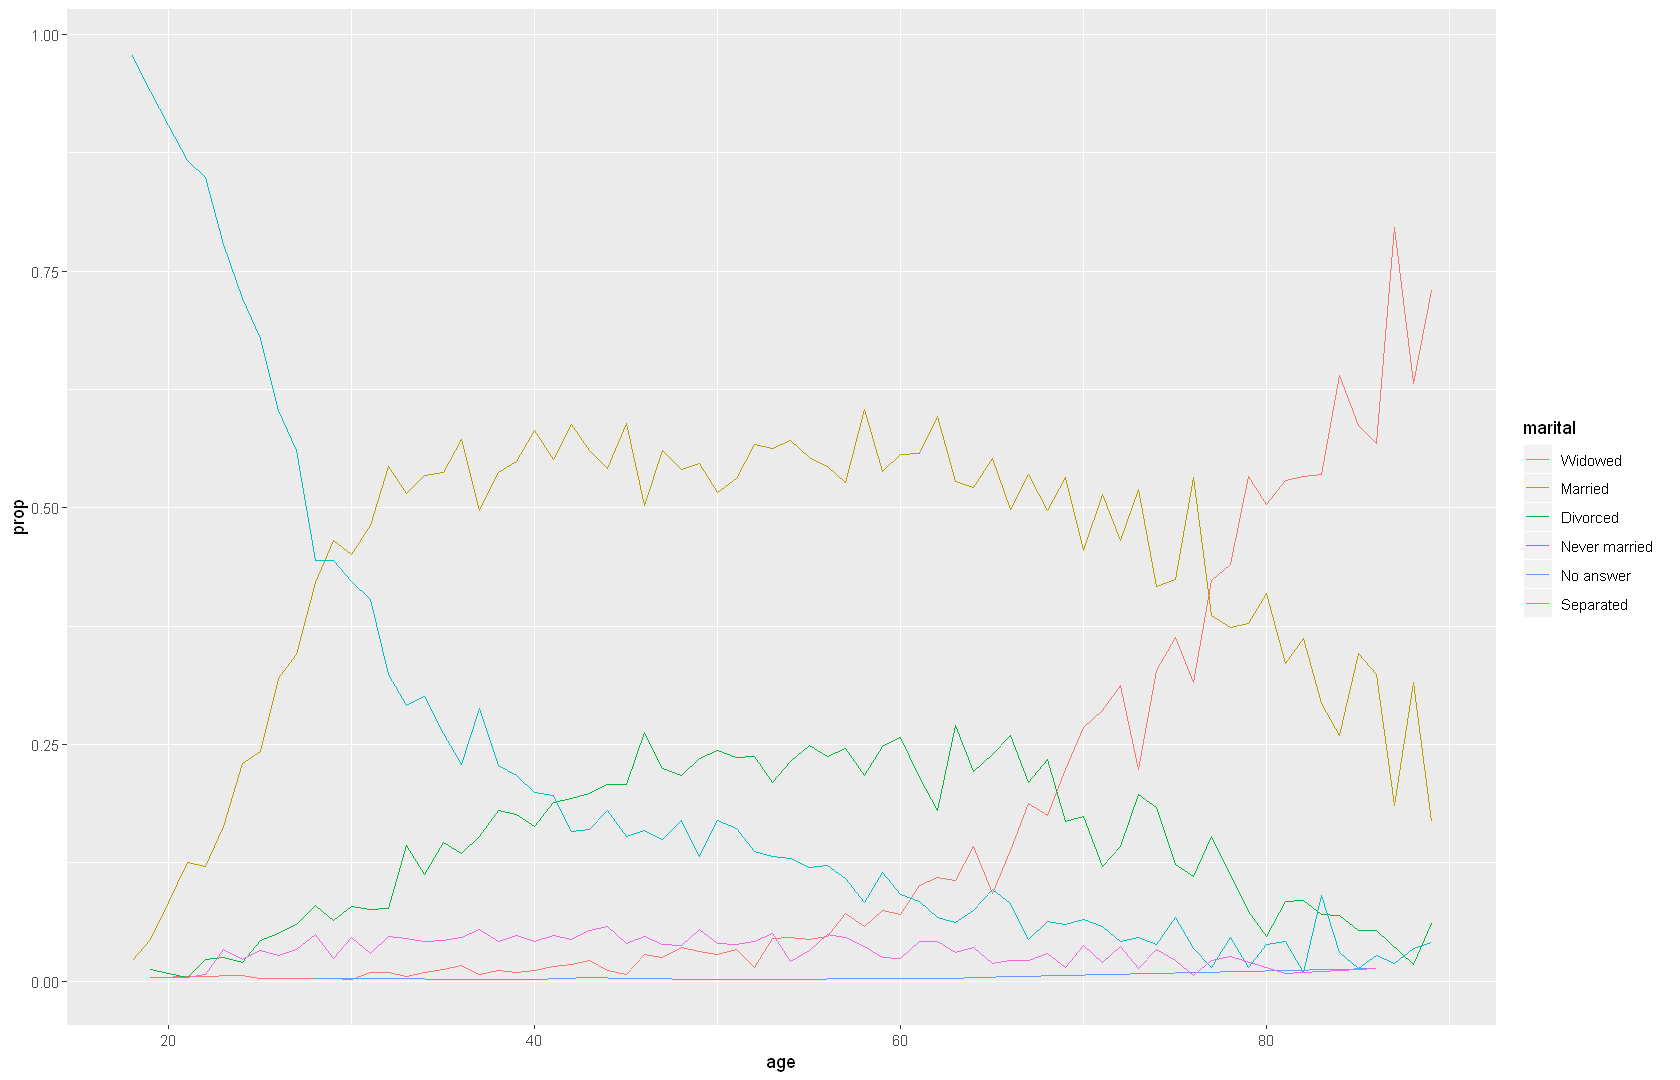

In [58]:
by_age <- gss_cat %>%
  filter(!is.na(age)) %>%
  count(age, marital) %>%
  group_by(age) %>%
  mutate(prop = n / sum(n))

ggplot(by_age, aes(age, prop, colour = marital)) +
  geom_line(na.rm = TRUE)

ggplot(by_age, aes(age, prop, colour = fct_reorder2(marital, age, prop))) +
  geom_line() +
  labs(colour = "marital")

Finally, for bar plots, you can use `fct_infreq()` to order levels in increasing frequency: this is the simplest type of reordering because it doesn’t need any extra variables. You may want to combine with `fct_rev()`.

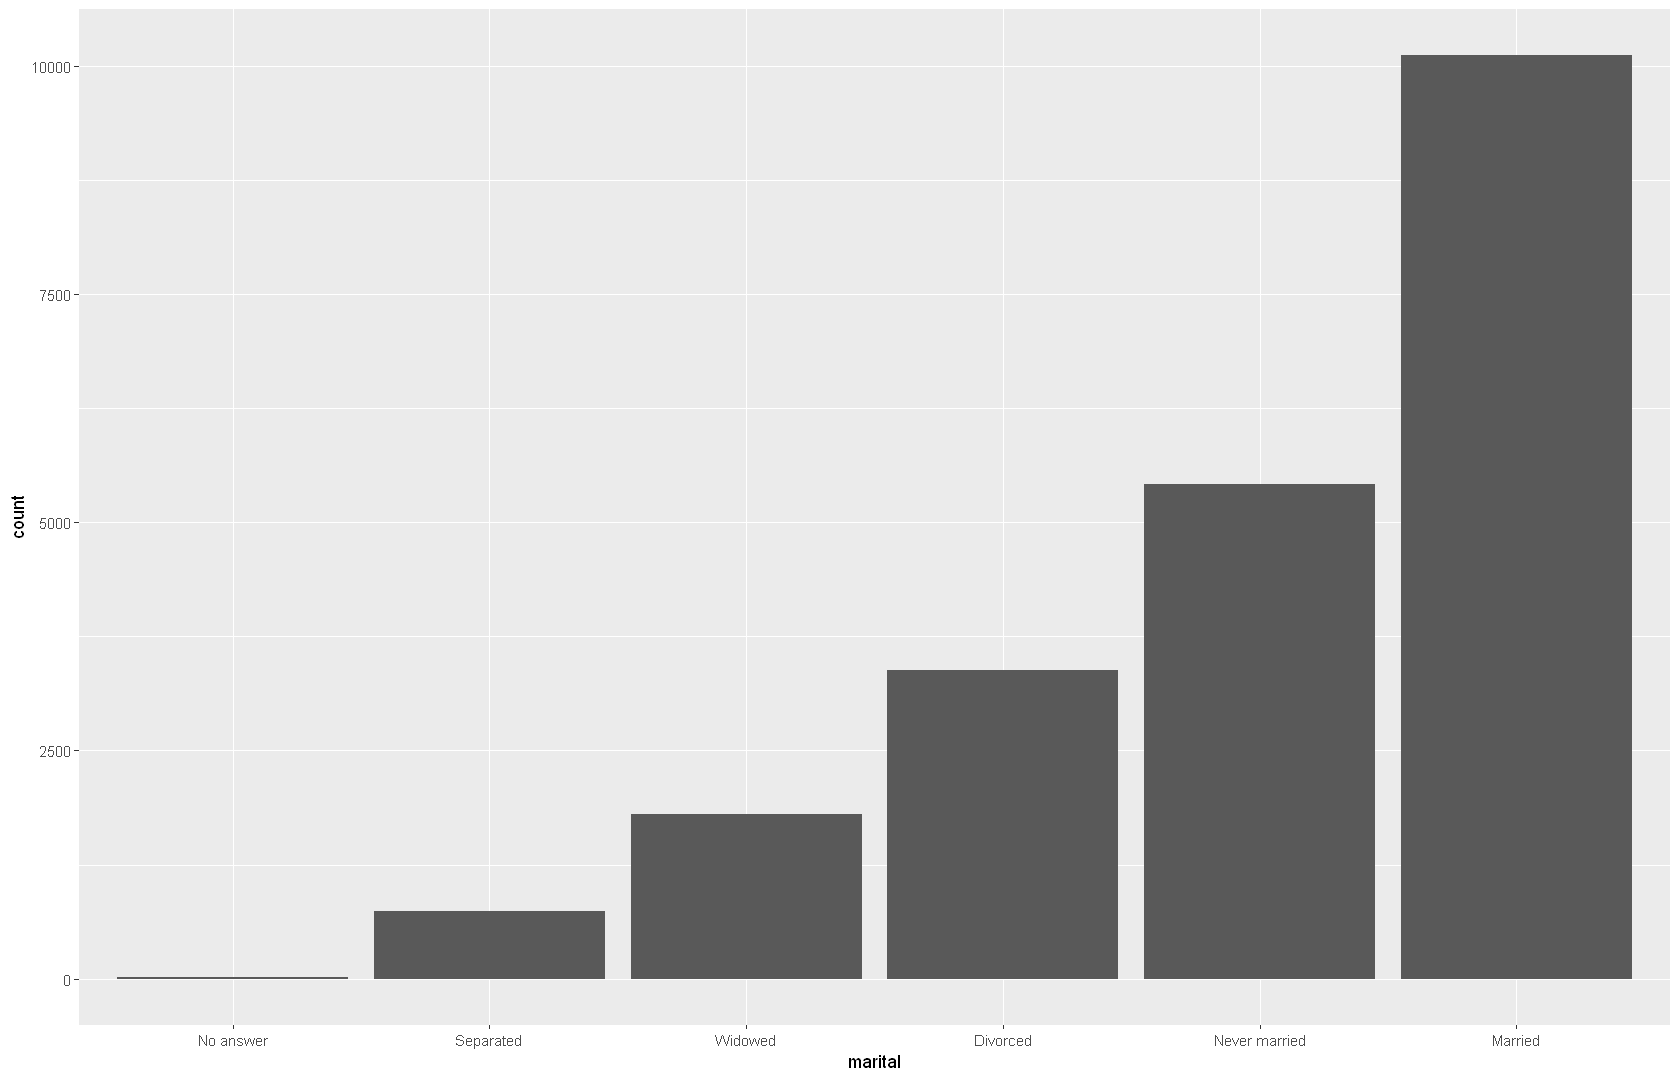

In [59]:
gss_cat %>%
  mutate(marital = marital %>% fct_infreq() %>% fct_rev()) %>%
  ggplot(aes(marital)) +
    geom_bar()

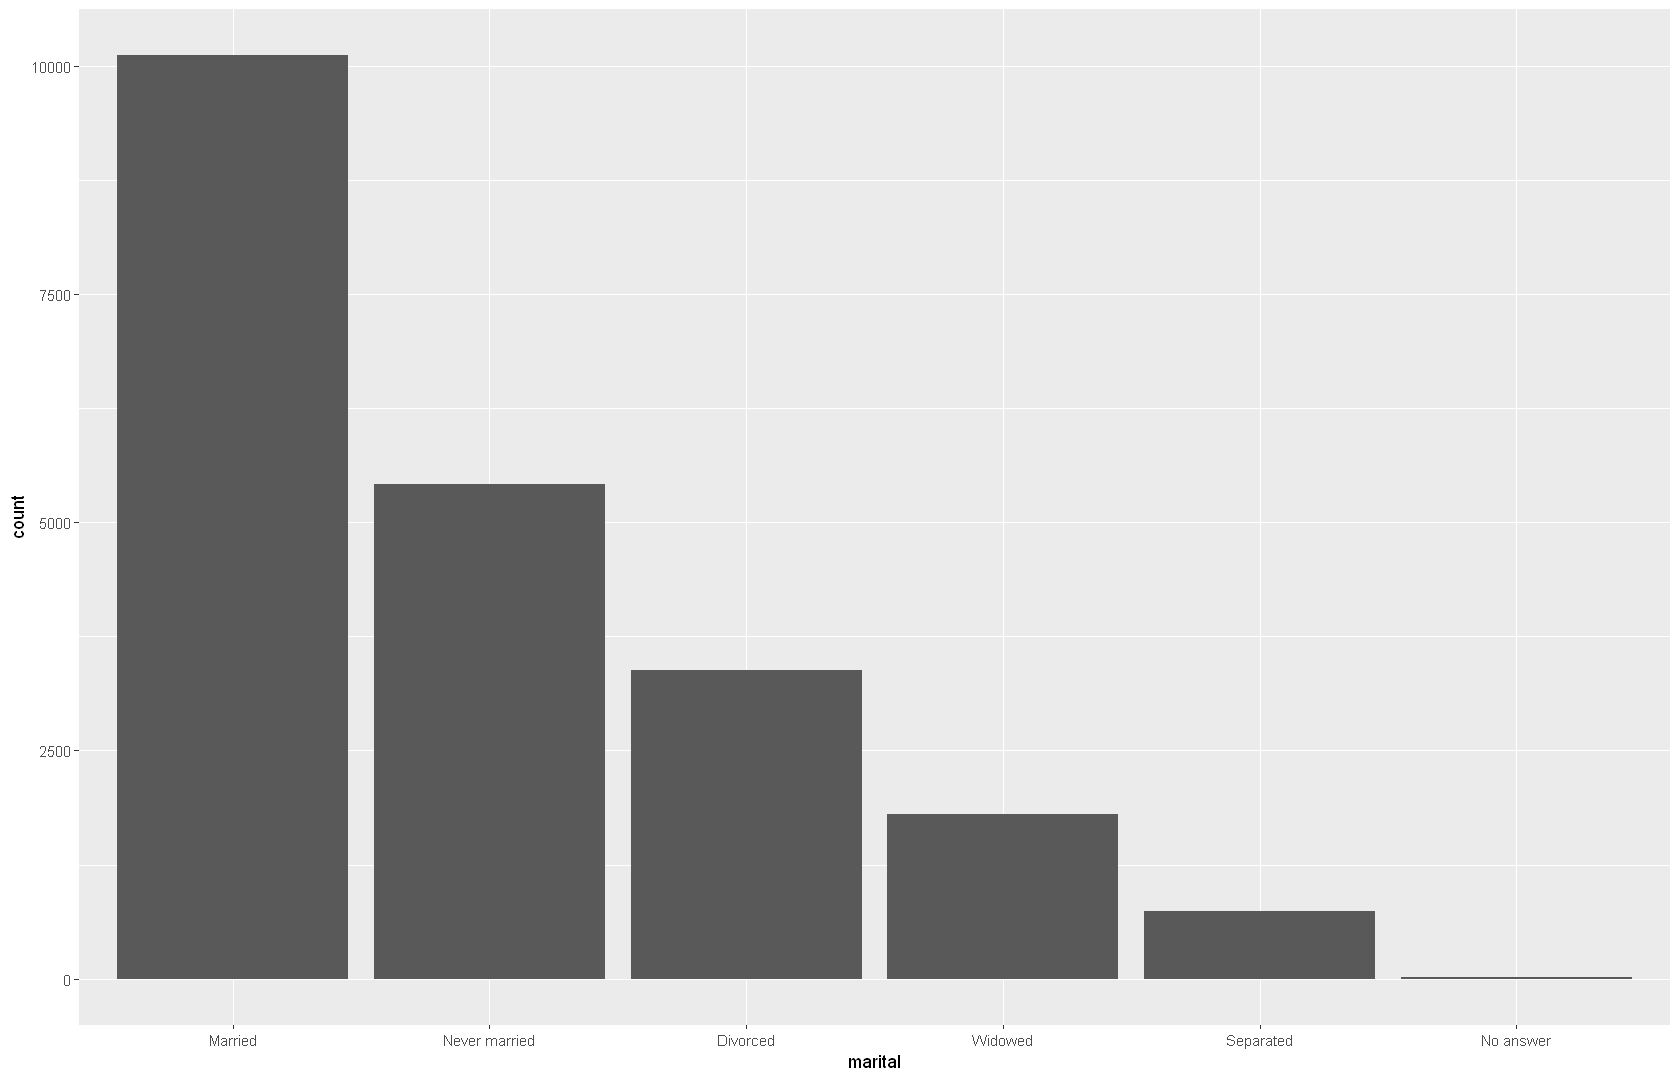

In [61]:
gss_cat %>%
  mutate(marital = marital %>% fct_infreq()) %>%
  ggplot(aes(marital)) +
    geom_bar()

### Exercises

<b><font color = 'purple'>1. There are some suspiciously high numbers in `tvhours`. Is the mean a good summary?</font></b>

In [64]:
summary(gss_cat[["tvhours"]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   2.000   2.981   4.000  24.000   10146 

In [66]:
gss_cat$tvhours %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   2.000   2.981   4.000  24.000   10146 

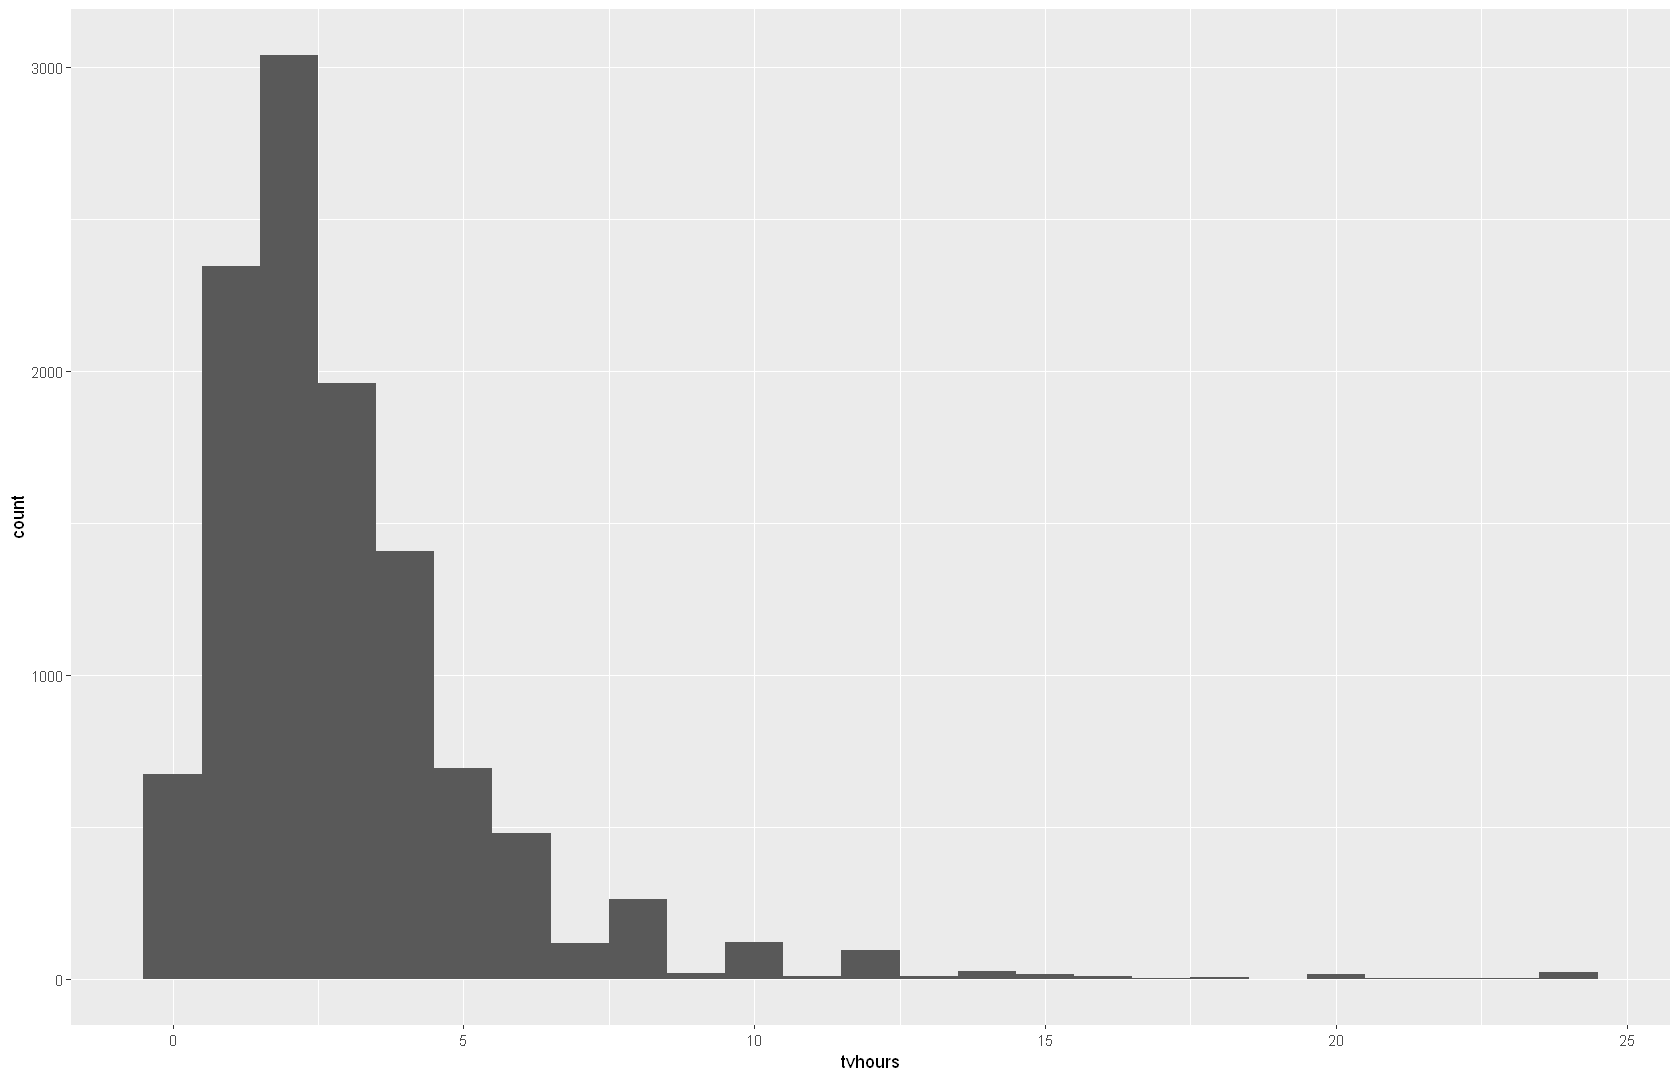

In [67]:
gss_cat %>%
  filter(!is.na(tvhours)) %>%
  ggplot(aes(x = tvhours)) +
  geom_histogram(binwidth = 1)

Whether the mean is the best summary depends on what you are using it for :-), i.e. your object

<hypothesis-highlight class="hypothesis-highlight">ive.</hypothesis-highlight>
But probably the median would be what most people prefer.
And the hours of TV doesn’t look that surprising to me.

<b><font color = 'purple'>2. For each factor in `gss_cat` identify whether the order of the levels is   arbitrary or principled. </font></b>

The following piece of code uses functions introduced in Ch 21, to print out the names of only the factors.

In [68]:
keep(gss_cat, is.factor) %>% names()
#> [1] "marital" "race"    "rincome" "partyid" "relig"   "denom"

[1] "marital" "race"    "rincome" "partyid" "relig"   "denom"


There are six categorical variables: `marital`, `race`, `rincome`, `partyid`, `relig`, and `denom`.

The ordering of marital is “somewhat principled”. There is some sort of logic
in that the levels are grouped “never married”, married at some point
(separated, divorced, widowed), and “married”; though it would seem that “Never
Married”, “Divorced”, “Widowed”, “Separated”, “Married” might be more natural.
I find that the question of ordering can be determined by the level of
aggregation in a categorical variable, and there can be more “partially
ordered” factors than one would expect.

In [69]:
levels(gss_cat[["marital"]])

[1] "No answer"     "Never married" "Separated"     "Divorced"     
[5] "Widowed"       "Married"

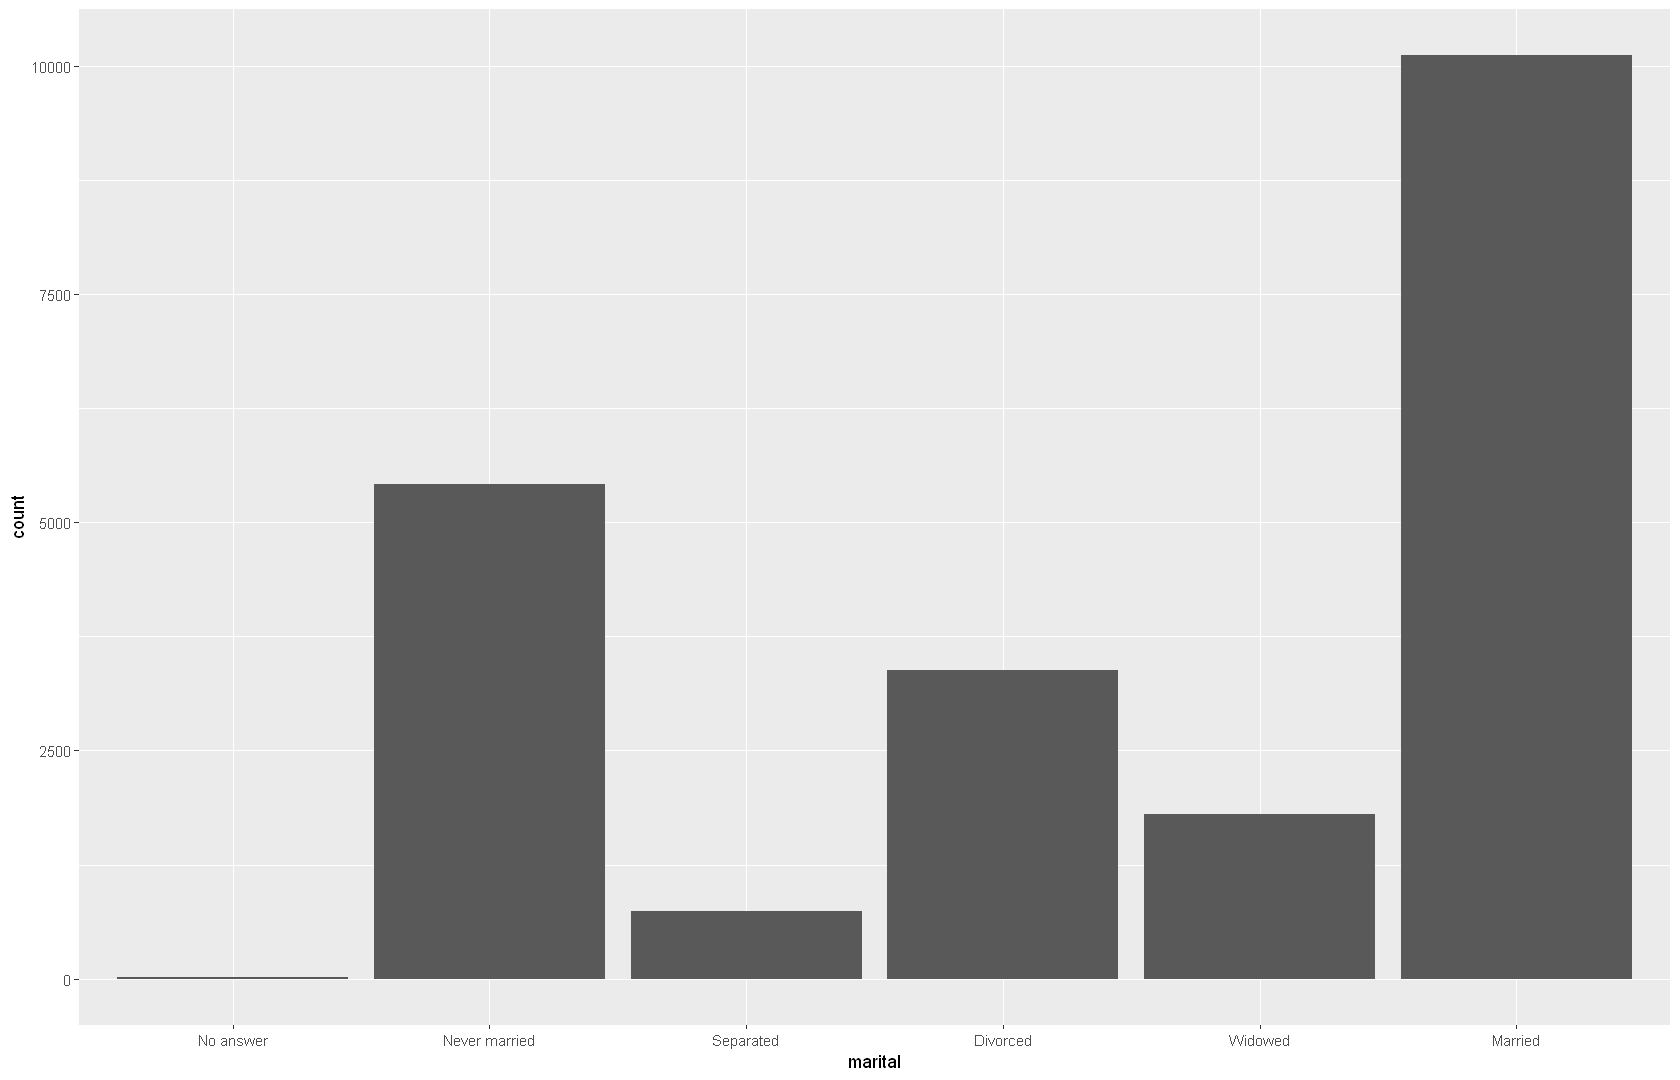

In [70]:
gss_cat %>%
  ggplot(aes(x = marital)) +
  geom_bar()

The ordering of race is principled in that the categories are ordered by count of observations in the data.

In [71]:
levels(gss_cat$race)

[1] "Other"          "Black"          "White"          "Not applicable"

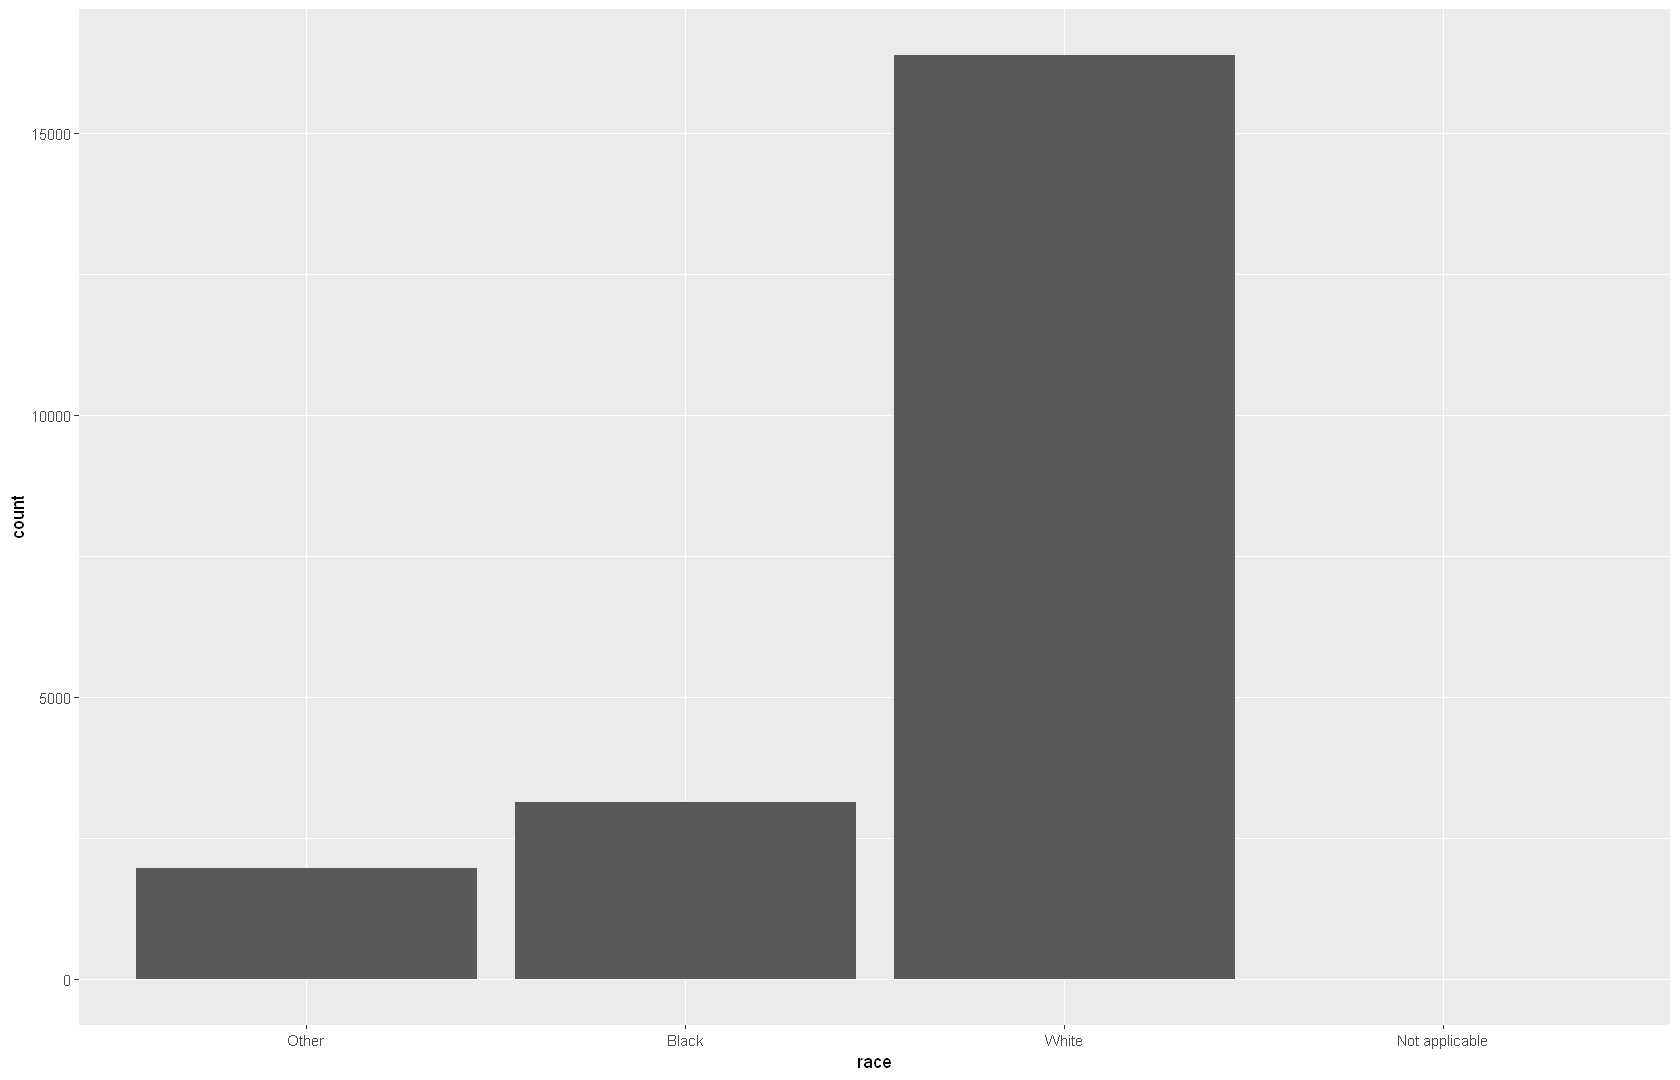

In [74]:
gss_cat %>%
  ggplot(aes(race)) +
  geom_bar() +
  scale_x_discrete(drop = FALSE)

The levels of `rincome` are ordered in decreasing order of the income; however
the placement of “No answer”, “Don’t know”, and “Refused” before, and “Not
applicable” after the income levels is arbitrary. It would be better to place
all the missing income level categories either before or after all the known
values.


In [76]:
levels(gss_cat$relig)

[1] "No answer"               "Don't know"             
 [3] "Inter-nondenominational" "Native american"        
 [5] "Christian"               "Orthodox-christian"     
 [7] "Moslem/islam"            "Other eastern"          
 [9] "Hinduism"                "Buddhism"               
[11] "Other"                   "None"                   
[13] "Jewish"                  "Catholic"               
[15] "Protestant"              "Not applicable"

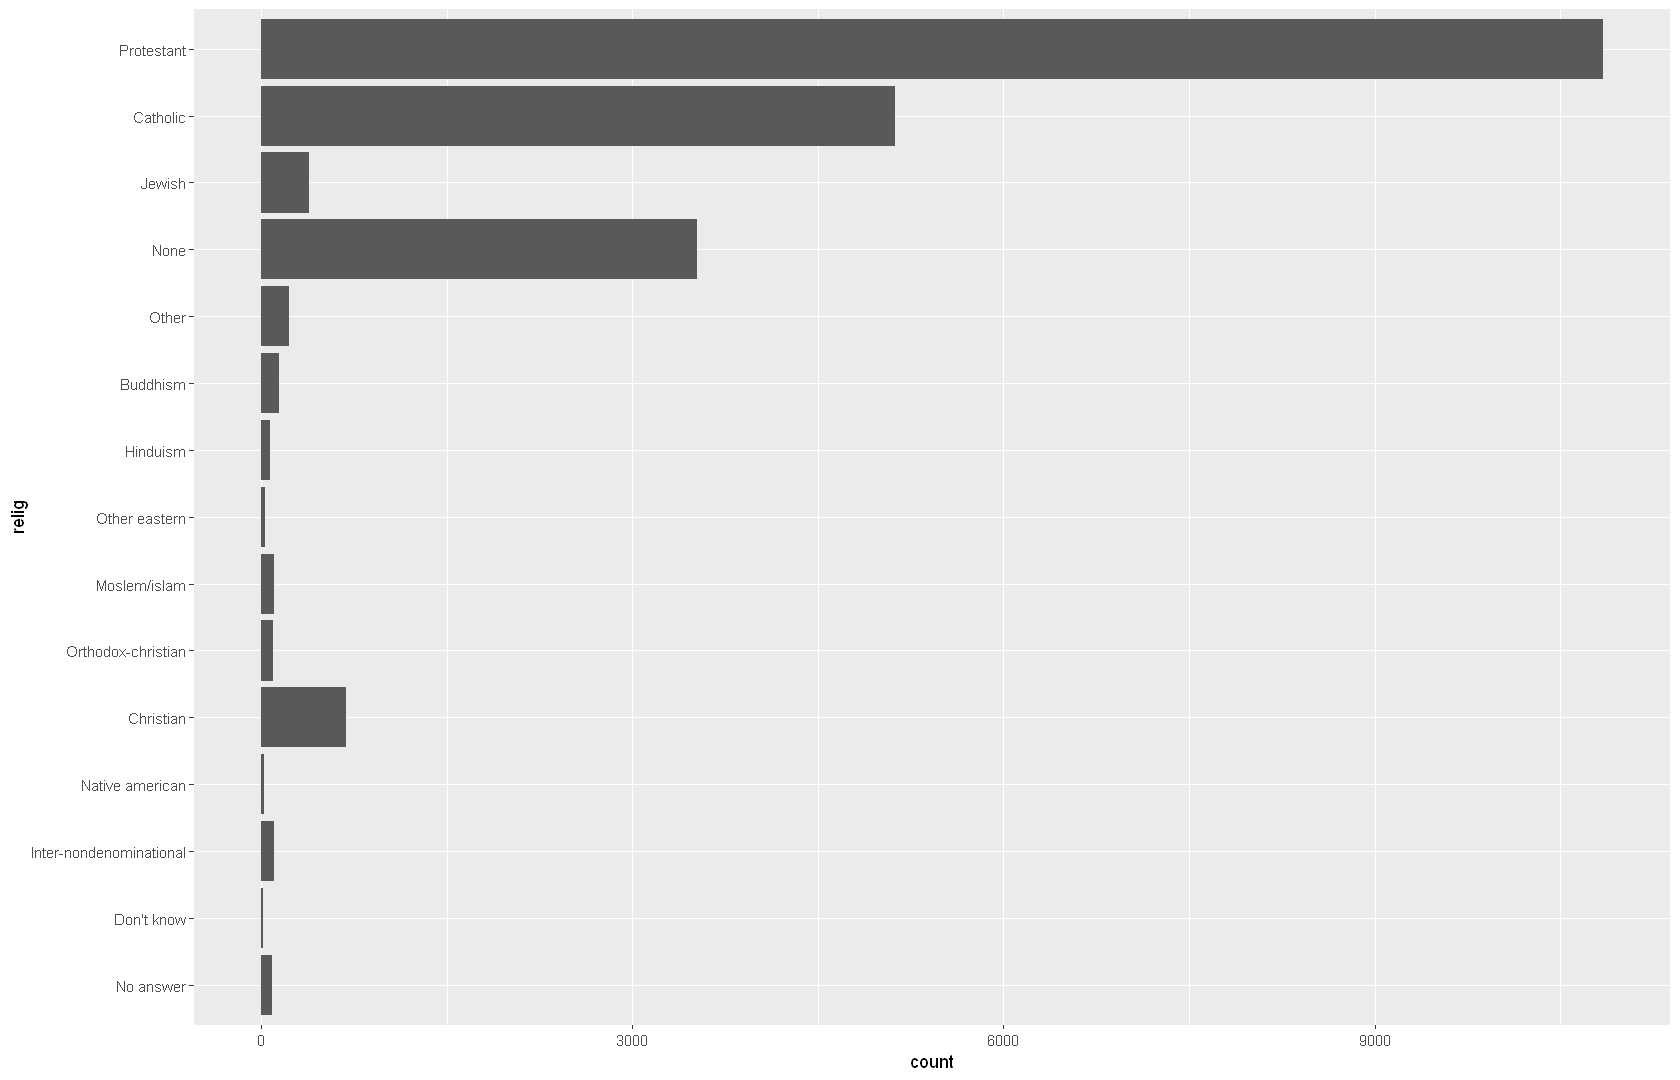

In [77]:
gss_cat %>%
  ggplot(aes(relig)) +
  geom_bar() +
  coord_flip()

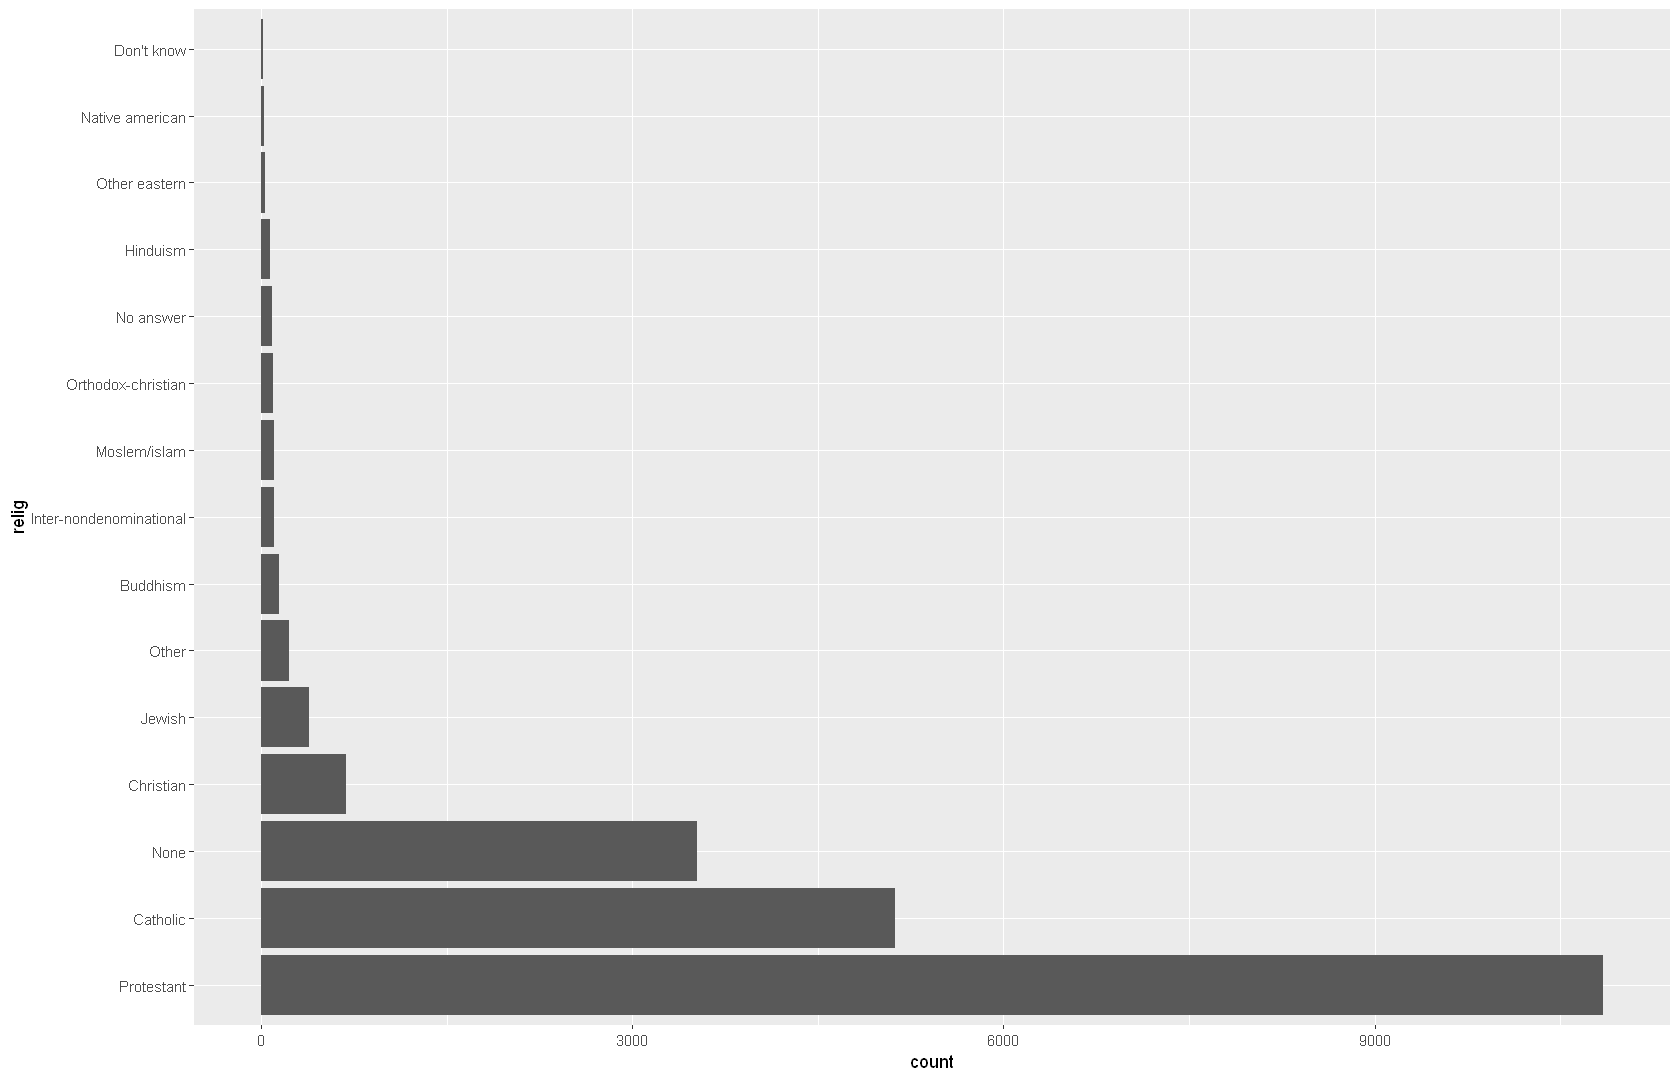

In [79]:
# experiment
gss_cat %>%
  mutate(relig = relig %>% fct_infreq()) %>% 
  ggplot(aes(relig)) +
  geom_bar() +
  coord_flip()

The same goes for `denom`.

In [85]:
levels(gss_cat$denom)

[1] "No answer"            "Don't know"           "No denomination"     
 [4] "Other"                "Episcopal"            "Presbyterian-dk wh"  
 [7] "Presbyterian, merged" "Other presbyterian"   "United pres ch in us"
[10] "Presbyterian c in us" "Lutheran-dk which"    "Evangelical luth"    
[13] "Other lutheran"       "Wi evan luth synod"   "Lutheran-mo synod"   
[16] "Luth ch in america"   "Am lutheran"          "Methodist-dk which"  
[19] "Other methodist"      "United methodist"     "Afr meth ep zion"    
[22] "Afr meth episcopal"   "Baptist-dk which"     "Other baptists"      
[25] "Southern baptist"     "Nat bapt conv usa"    "Nat bapt conv of am" 
[28] "Am bapt ch in usa"    "Am baptist asso"      "Not applicable"

Ignoring “No answer”, “Don’t know”, and “Other party”, the levels of partyid are ordered from “Strong Republican”" to “Strong Democrat”.

In [86]:
levels(gss_cat$partyid)

[1] "No answer"          "Don't know"         "Other party"       
 [4] "Strong republican"  "Not str republican" "Ind,near rep"      
 [7] "Independent"        "Ind,near dem"       "Not str democrat"  
[10] "Strong democrat"

<b><font color = 'purple'>3. Why did moving “Not applicable” to the front of the levels move it to the   bottom of the plot? </font></b>

Because that gives the level “Not applicable” an integer value of 1.